1. Зниження розмірності і візуалізація даних
Застосуйте методи зниження розмірності sklearn.decomposition.PCA і sklearn.manifold.TSNE для візуалізації даних, з якими ви працювали в лабораторній № 1 (знижуючи розмірність до двох). Візуалізуйте результат.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


# Завантаження датасету
dataset = pd.read_csv('USA_cars_datasets.csv')

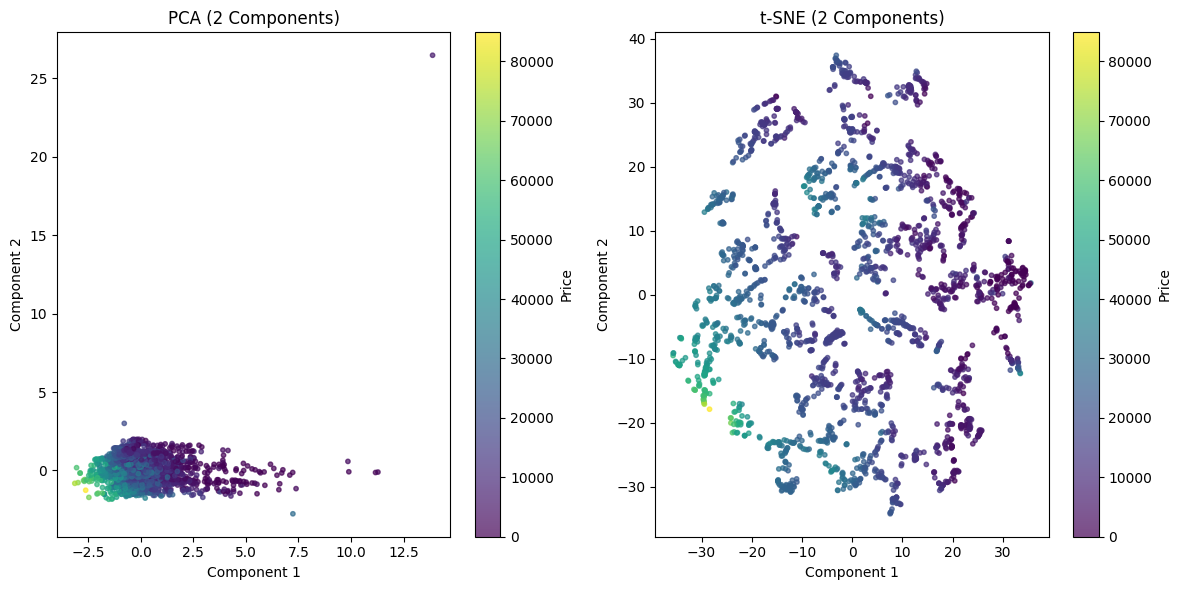

In [4]:
# Вибір числових колонок
numeric_data = dataset.select_dtypes(include=['float64', 'int64'])

# Нормалізація даних
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numeric_data)

# Зниження розмірності за допомогою PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_data)

# Зниження розмірності за допомогою t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=500)
tsne_result = tsne.fit_transform(normalized_data)

# Візуалізація результатів PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=dataset['price'], cmap='viridis', s=10, alpha=0.7)
plt.colorbar(label='Price')
plt.title('PCA (2 Components)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Візуалізація результатів t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=dataset['price'], cmap='viridis', s=10, alpha=0.7)
plt.colorbar(label='Price')
plt.title('t-SNE (2 Components)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.tight_layout()
plt.show()


2. Кластерний аналіз
1) За допомогою алгоритму k-means зробіть квантування зображення (видалення візуально надлишкової інформації) з глибиною 64, 32, 16 та 8 рівнів для будь-якого обраного самостійно зображення.

In [8]:
from sklearn.cluster import KMeans
from skimage import io
import numpy as np

c:\Users\denis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\denis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\denis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\denis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

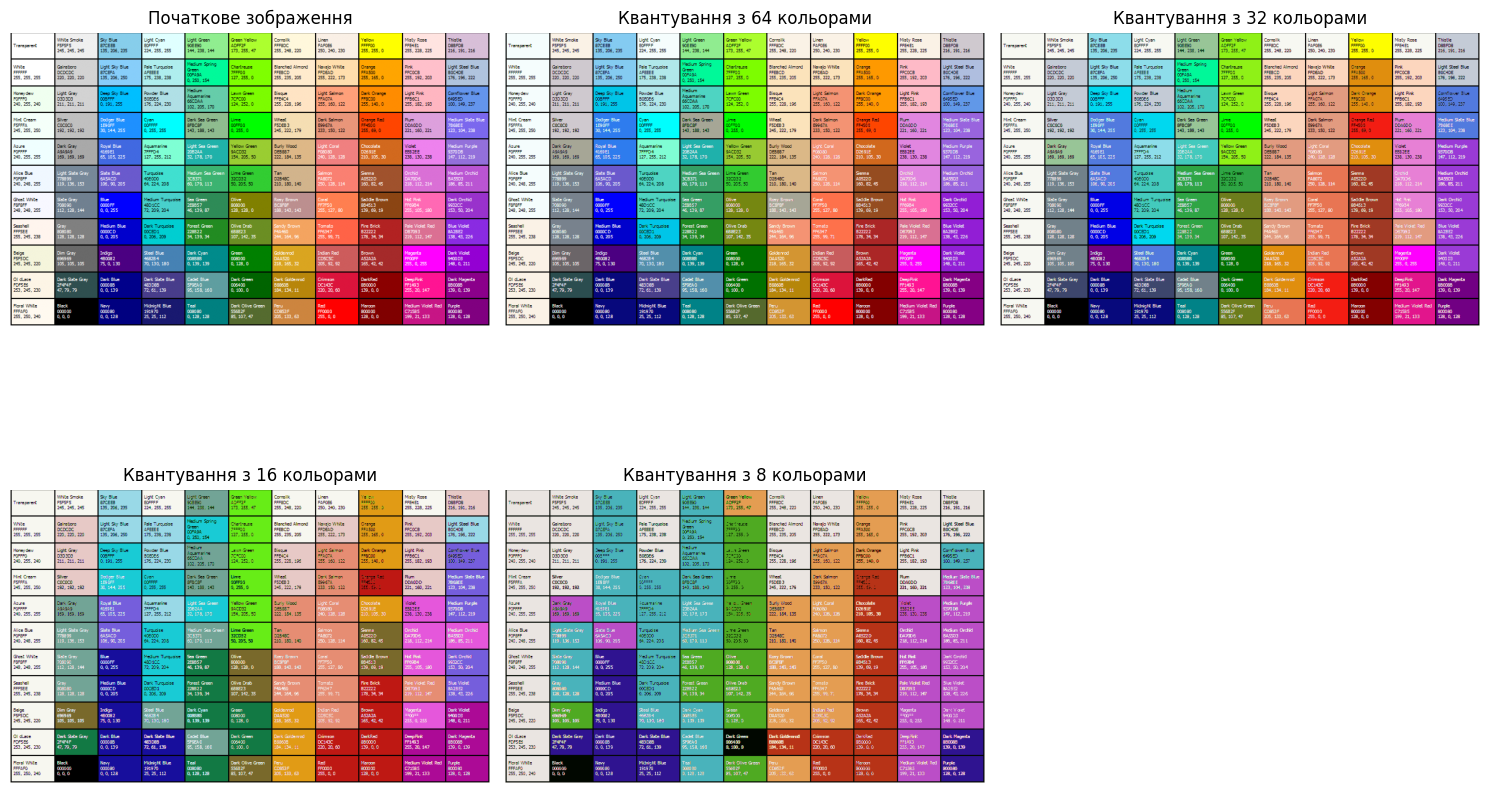

In [19]:
image = io.imread('1.jpg') 
image = image / 255.0  # Нормалізація значень пікселів до діапазону [0, 1]

# Перетворення зображення у двовимірний масив (пікселі та їх кольори RGB)
pixels = image.reshape(-1, 3)

def quantize_image(pixels, n_colors):
    """
    Функція для квантування зображення за допомогою алгоритму k-means.

    Аргументи:
    pixels (ndarray): Масив пікселів із даними про кольори.
    n_colors (int): Кількість кольорів для квантування.

    Повертає:
    quantized_image (ndarray): Квантуване зображення, перетворене у початковий розмір.
    """
    kmeans = KMeans(n_clusters=n_colors, random_state=42)  # Налаштування k-means
    kmeans.fit(pixels)  # Навчання моделі
    quantized_pixels = kmeans.cluster_centers_[kmeans.labels_]  # Отримання нових кольорів
    return quantized_pixels.reshape(image.shape)  # Перетворення назад у розмір зображення

# Квантування зображення для різних рівнів кольорів
levels = [64, 32, 16, 8]
quantized_images = [quantize_image(pixels, n_colors) for n_colors in levels]

# Візуалізація початкового та квантуваних зображень
plt.figure(figsize=(15, 10))

# Початкове зображення
plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Початкове зображення")
plt.axis("off")

# Квантувані зображення
for i, (quantized_image, n_colors) in enumerate(zip(quantized_images, levels), start=2):
    plt.subplot(2, 3, i)
    plt.imshow(quantized_image)
    plt.title(f"Квантування з {n_colors} кольорами")
    plt.axis("off")

plt.tight_layout()
plt.show()

3. Обробка та класифікація текстових даних
Завантажте набір текстових даних (з мітками класів). Проведіть передобробку даних (видаліть стоп-слова, пунктуацію), за допомогою wordcloud зробіть візуалізацію найбільш поширених слів або n-gram у кожному класі. Векторизуйте тексти (наприклад за допомогою sklearn.feature_extraction.text.TfidfVectorizer). Проведіть класифікацію текстових даних, зробіть оцінку якості. 

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from wordcloud import WordCloud
import string
import nltk


In [14]:
# Завантаження датасету
dataset_path = 'IMDB Dataset.csv' 
imdb_data = pd.read_csv(dataset_path)

print(imdb_data.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\denis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


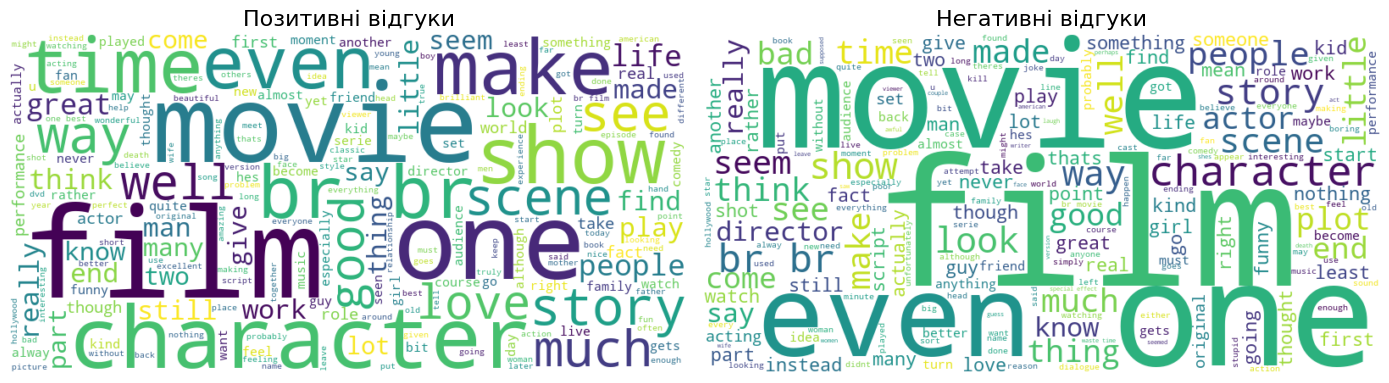

Accuracy: 0.8523

Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.86      0.85      4961
    positive       0.86      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [15]:
# Завантаження необхідних інструментів для обробки тексту
nltk.download('stopwords')
from nltk.corpus import stopwords

# Функція для передобробки тексту
def preprocess_text(text):
    # Приведення тексту до нижнього регістру
    text = text.lower()
    # Видалення пунктуації
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Видалення стоп-слів
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Передобробка текстових даних
imdb_data['cleaned_review'] = imdb_data['review'].apply(preprocess_text)

# Розділення даних за класами для створення WordCloud
positive_reviews = ' '.join(imdb_data[imdb_data['sentiment'] == 'positive']['cleaned_review'])
negative_reviews = ' '.join(imdb_data[imdb_data['sentiment'] == 'negative']['cleaned_review'])

# Візуалізація найпоширеніших слів у позитивних і негативних відгуках
plt.figure(figsize=(14, 7))

# WordCloud для позитивних відгуків
plt.subplot(1, 2, 1)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Позитивні відгуки', fontsize=16)
plt.axis('off')

# WordCloud для негативних відгуків
plt.subplot(1, 2, 2)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Негативні відгуки', fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()

# Векторизація тексту за допомогою TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(imdb_data['cleaned_review'])
y = imdb_data['sentiment']

# Розділення даних на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Класифікація за допомогою RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Прогнозування та оцінка
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
